In [59]:
import tensorflow as tf
import numpy as np
import timeit

### Tensors

 Tensors are multidimensional arrays

In [28]:
x = tf.constant([[1, 2, 4],
                 [3, 5, 6]])

x

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 4],
       [3, 5, 6]])>

In [29]:
print(f"Tensor x \n {x}")
print(f"Tensor x shape :   {x.shape}")
print(f"Tensor x dtype :   {x.dtype}")

Tensor x 
 [[1 2 4]
 [3 5 6]]
Tensor x shape :   (2, 3)
Tensor x dtype :   <dtype: 'int32'>


In [30]:
y = tf.convert_to_tensor(np.array([[1, 0, 1],[1, 1, 1]]))
y

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 0, 1],
       [1, 1, 1]])>

In [31]:
### Tensor operations

print(f"Transpose of x \n {x @ tf.transpose(x)}")

print(f"Concat x & y \n {tf.concat([x,y], axis=0)}")

print(f"Reduce sum {tf.reduce_sum([1,2,3])}")

Transpose of x 
 [[21 37]
 [37 70]]
Concat x & y 
 [[1 2 4]
 [3 5 6]
 [1 0 1]
 [1 1 1]]
Reduce sum 6


### Variables

Normal tf.Tensor objects are immutable. To store model weights (or other mutable state) in TensorFlow use a `tf.Variable`.

In [37]:
x_var = tf.Variable(x)
x_var

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 4],
       [3, 5, 6]])>

In [33]:
### Adding values to varible within the same ref
x_var.assign_add(y)
x_var

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[2, 2, 5],
       [4, 6, 7]])>

In [38]:
x_var.assign([[1, 2, 4],
       [3, 5, 6]])
x_var

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 4],
       [3, 5, 6]])>

In [39]:
#Most tensor operations work on variables as expected, although variables cannot be reshaped. 
## its creating tensor not varible

x_var_re = tf.reshape(x_var, [3,2])
x_var_re

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [4, 3],
       [5, 6]])>

### Automatic differentiation
Implementing automatic differentiation (autodiff), which uses calculus to compute gradients. Typically you'll use this to calculate the gradient of a model's error or loss with respect to its weights.

Gradient tapes
TensorFlow provides the `tf.GradientTape` API for automatic differentiation;
Once you've recorded some operations, use `GradientTape.gradient`(target, sources) to calculate the gradient of some target (often a loss) relative to some source (often the model's variables):

In [4]:
x = tf.Variable(2.0)

def fun(x):
    y = x**2+2*x+5
    
    return y

fun(x)

<tf.Tensor: shape=(), dtype=float32, numpy=13.0>

In [ ]:
with tf.GradientTape() as tape:
    y = fun(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx  = 2x+2
g_x

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [6]:
## Gradient with two varibles

w = tf.Variable(tf.random.normal((3,2)), name='w')
b = tf.Variable(tf.zeros(2), name='b')

x=[[1., 2., 3.]]

In [7]:
with tf.GradientTape() as tape:
    y = x @ w +b
    loss = tf.reduce_mean(y**2)

In [8]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b])

In [11]:
w, b

(<tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
 array([[ 0.49473074, -2.23581   ],
        [-1.1306745 ,  0.03210247],
        [-1.1583433 , -1.6996672 ]], dtype=float32)>,
 <tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>)

In [10]:
dl_dw, dl_db

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ -5.241648,  -7.270607],
        [-10.483296, -14.541214],
        [-15.724945, -21.811821]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([-5.241648, -7.270607], dtype=float32)>)

In [ ]:
###Gradients with respect to a model

layer = tf.keras.layers.Dense(2, activation='relu')
x = tf.constant([[1., 2., 3.]])

y = layer(x)

y,layer    

(<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.       , 3.0652003]], dtype=float32)>,
 <Dense name=dense_1, built=True>)

In [ ]:
# Trainable parameters (weights & baises)
layer.trainable_variables

[<Variable path=dense_1/kernel, shape=(3, 2), dtype=float32, value=[[-0.32881343  0.5527402 ]
  [-0.14014363 -0.3658083 ]
  [-0.9868201   1.0813589 ]]>,
 <Variable path=dense_1/bias, shape=(2,), dtype=float32, value=[0. 0.]>]

In [27]:
with tf.GradientTape() as tape:
  # Forward pass
  y = layer(x)
  loss = tf.reduce_mean(y**2)

grad = tape.gradient(loss, layer.trainable_variables)

In [28]:
loss, np.mean(np.square([0.       , 3.0652003]))

(<tf.Tensor: shape=(), dtype=float32, numpy=4.697726726531982>,
 4.697726439560045)

In [29]:
grad

[<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[0.       , 3.0652003],
        [0.       , 6.1304007],
        [0.       , 9.1956005]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.       , 3.0652003], dtype=float32)>]

### Graphs and tf.function

TensorFlow originally used **static computation graphs** (TF 1.x), where the computation is described first, and then run.
In TensorFlow 2.x, the default mode is **eager execution**, which is more intuitive (like PyTorch) but slightly less performant. To get the performance of static graphs, you use:`@tf.function` This decorator converts Python functions into TensorFlow computation graphs.

In [45]:
# Coverting python fun to Tensorflow graph

@tf.function
def get_MSE(y_true, y_pred):
    sq_diff = tf.pow((y_true-y_pred),2)
    print("Calculating MSE")
    return tf.reduce_mean(sq_diff)


In [46]:
y_true = tf.random.uniform([5],maxval=10)
y_pred = tf.random.uniform([5],maxval=10)

print(y_true)
print(y_pred)

tf.Tensor([8.35292   9.274664  5.5500736 5.202558  6.934885 ], shape=(5,), dtype=float32)
tf.Tensor([7.318878  2.5516403 9.539125  5.304489  5.4756594], shape=(5,), dtype=float32)


In [ ]:
##However, tf.function can behave differently under graph and eager execution. 
# The Python print function is one example of how these two modes differ. 
# Tracing captures the TensorFlow operations into a graph, and print is not captured in the graph. That graph is then executed for all three calls without ever running the Python code again.

error = get_MSE(y_true, y_pred) 
error = get_MSE(y_true, y_pred)# It won't print beacauce earlier alredy function traced. When function traced then only prints
error = get_MSE(y_true, y_pred)


Calculating MSE


In [49]:
tf.config.run_functions_eagerly(True)
get_MSE(y_true, y_pred)

Calculating MSE


<tf.Tensor: shape=(), dtype=float32, numpy=12.864109992980957>

In [50]:
# Don't forget to set it back when you are done.
tf.config.run_functions_eagerly(False)

In [54]:
## Checking Speed with without tf.function

def matrix_power(x, y):
    result = tf.eye(len(x), dtype=tf.dtypes.int32)

    for _ in range(y):
        result = tf.matmul(x, result)
    
    return result

In [55]:
x = tf.random.uniform([10, 10], maxval=2, dtype=tf.dtypes.int32)
x

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[0, 1, 1, 1, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 1, 1, 0, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 0, 1, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]])>

In [ ]:
#without tf function
# %time
# matrix_power(x, 1000)

print("Eager execution:", timeit.timeit(lambda: matrix_power(x, 100), number=1000), "seconds")

Eager execution: 3.413141999975778 seconds


In [62]:
matrix_power_as_graph = tf.function(matrix_power)
print("Graph execution:", timeit.timeit(lambda: matrix_power_as_graph(x, 100), number=1000), "seconds")

Graph execution: 0.8467953000217676 seconds


### Modules, layers, and models
`tf.Module` is a class for managing your tf.Variable objects, and the tf.function objects that operate on them. 
The `tf.Module` class is necessary to support two significant features: 
You can save and restore the values of your variables using `tf.train.Checkpoint`. 
You can import and export the tf.Variable values and the tf.function graphs using `tf.saved_model`.


`tf.Module` is the base class for both `tf.keras.layers.Layer` and `tf.keras.Model`


In [63]:
class MyModule(tf.Module):
    def __init__(self, value):
        self.weight = tf.Variable(value)
    
    @tf.function
    def multiply(self, x):
        return self.weight * x

In [65]:
mod = MyModule(5)
mod.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 5, 10, 15])>

In [66]:
# Saving the Module
saved_path = './my_module'
tf.saved_model.save(mod, saved_path)

INFO:tensorflow:Assets written to: ./my_module\assets


INFO:tensorflow:Assets written to: ./my_module\assets


In [ ]:
# Loading the Module
loaded_mod = tf.saved_model.load(saved_path)
loaded_mod.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 5, 10, 15])>

In [85]:
#Building Layer using tf.Module
class Dense(tf.Module):
    def __init__(self, in_feat, out_feat, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(
            tf.random.normal([in_feat, out_feat], name='w')
        )
        self.b = tf.Variable(tf.ones([out_feat], name='b'))

    def __call__(self, x):
        return tf.nn.relu(tf.matmul(x,self.w) + self.b)
        

In [94]:
#Building model using above layer

class SequntialModel(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)

        self.dense1 = Dense(5,3,name='layer_one')
        self.dense2 = Dense(3,2,name='layer_two')
    
    @tf.function
    def __call__(self, x):
        x = self.dense1(x)
        out = self.dense2(x)
    
        return out

seq_model = SequntialModel(name='the_model')

for var in seq_model.variables:
    print(var)


<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>
<tf.Variable 'Variable:0' shape=(5, 3) dtype=float32, numpy=
array([[ 1.6928855 ,  0.9217229 , -0.73530596],
       [-0.52517277,  0.5777911 , -1.1262944 ],
       [-0.47264582, -0.6502489 , -0.2477316 ],
       [ 0.76244205,  0.54620403, -1.2721446 ],
       [ 2.0741723 , -0.48378697,  1.410177  ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 1.], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.04829964,  0.14892475],
       [ 0.70773   , -0.1650415 ],
       [-0.42150038,  0.07438178]], dtype=float32)>


In [91]:
print("Model results:",seq_model(tf.constant([[1.0, 2.0, 4.0, 5.0, 10.0]])))

Model results: tf.Tensor([[2.872139  3.8855078]], shape=(1, 2), dtype=float32)


In [93]:
print("Submodules:", seq_model.submodules)

Submodules: (<__main__.Dense object at 0x0000021F6C6EF340>, <__main__.Dense object at 0x0000021F6BEA8E20>)


In [95]:
### Training loops

In [106]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [6, 4]

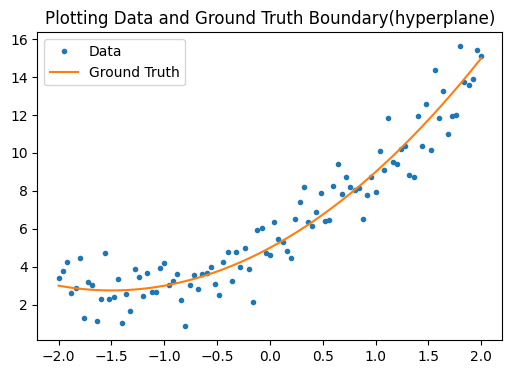

In [109]:
# Preparing Line Data and ground truth values
x = tf.linspace(-2, 2, 101)
x = tf.cast(x, dtype=tf.float32)

def f(x):
    y = x**2 + 3*x + 5
    return y

y = f(x) + tf.random.normal([101])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground Truth')
plt.title("Plotting Data and Ground Truth Boundary(hyperplane)")
plt.legend()
plt.show()

In [113]:
class LineQuadModel(tf.Module):
    def __init__(self, name=None):
        super().__init__(name)
        self.w_l = tf.Variable(tf.random.uniform([1], maxval=5.))
        self.w_r = tf.Variable(tf.random.uniform([1], maxval=5.)) 
        self.b = tf.Variable(tf.random.uniform([1], maxval=5.))

    @tf.function
    def __call__(self, x):
        # Quadratic Model : quadratic_weight * x^2 + linear_weight * x + bias
       return self.w_l*(x**2) + self.w_r*x + self.b

quad_model = LineQuadModel()

print("Model variables \n", quad_model.variables)

Model variables 
 (<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.9758946], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.3684461], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.0134764], dtype=float32)>)


In [114]:
quad_model(x)

<tf.Tensor: shape=(101,), dtype=float32, numpy=
array([-4.577274  , -4.475097  , -4.3717403 , -4.267205  , -4.161491  ,
       -4.054598  , -3.946525  , -3.837274  , -3.7268434 , -3.6152344 ,
       -3.5024457 , -3.3884783 , -3.2733316 , -3.1570063 , -3.0395017 ,
       -2.9208183 , -2.8009553 , -2.679914  , -2.557693  , -2.4342937 ,
       -2.3097148 , -2.183957  , -2.0570202 , -1.9289044 , -1.7996091 ,
       -1.6691357 , -1.5374826 , -1.404651  , -1.27064   , -1.1354498 ,
       -0.999081  , -0.8615328 , -0.7228061 , -0.5828999 , -0.44181454,
       -0.29955065, -0.1561073 , -0.0114851 ,  0.13431597,  0.28129613,
        0.4294554 ,  0.57879364,  0.7293111 ,  0.88100743,  1.0338827 ,
        1.1879371 ,  1.3431706 ,  1.499583  ,  1.6571746 ,  1.815945  ,
        1.9758946 ,  2.1370232 ,  2.2993307 ,  2.4628174 ,  2.627483  ,
        2.7933278 ,  2.9603515 ,  3.128554  ,  3.297936  ,  3.4684968 ,
        3.6402364 ,  3.8131552 ,  3.9872532 ,  4.16253   ,  4.338986  ,
        4.516621

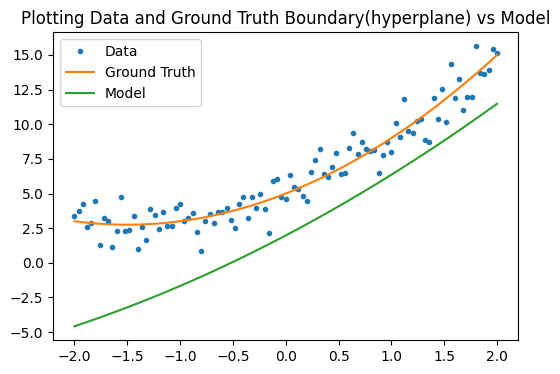

In [115]:
plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x.numpy(), f(x), label='Ground Truth')
plt.plot(x.numpy(), quad_model(x), label='Model')
plt.title("Plotting Data and Ground Truth Boundary(hyperplane) vs Model")
plt.legend()
plt.show()

In [116]:
#Loss function
@tf.function
def mse_loss(y_true, y_pred):
    sq_diff = tf.pow((y_true-y_pred),2)
    return tf.reduce_mean(sq_diff)

In [118]:
# Traiing the model using loops

epoches = 200
learning_rate = 0.01

for epoch in range(1, epoches+1):
    with tf.GradientTape() as tape:
        y_pred = quad_model(x)
        loss = mse_loss(y_pred, y)
    grads = tape.gradient(loss, quad_model.variables)

    for g,v in zip(grads, quad_model.variables):
        v.assign_sub(learning_rate*g)

    if(epoch%10 == 0):
        print(f" Epoch: {epoch} , Loss: {loss}")


 Epoch: 10 , Loss: 1.5441691875457764
 Epoch: 20 , Loss: 1.4765052795410156
 Epoch: 30 , Loss: 1.418736219406128
 Epoch: 40 , Loss: 1.369288682937622
 Epoch: 50 , Loss: 1.3268886804580688
 Epoch: 60 , Loss: 1.2904895544052124
 Epoch: 70 , Loss: 1.2592166662216187
 Epoch: 80 , Loss: 1.2323334217071533
 Epoch: 90 , Loss: 1.2092162370681763
 Epoch: 100 , Loss: 1.1893322467803955
 Epoch: 110 , Loss: 1.1722263097763062
 Epoch: 120 , Loss: 1.1575087308883667
 Epoch: 130 , Loss: 1.1448454856872559
 Epoch: 140 , Loss: 1.1339493989944458
 Epoch: 150 , Loss: 1.124572992324829
 Epoch: 160 , Loss: 1.1165046691894531
 Epoch: 170 , Loss: 1.1095614433288574
 Epoch: 180 , Loss: 1.1035866737365723
 Epoch: 190 , Loss: 1.0984450578689575
 Epoch: 200 , Loss: 1.0940204858779907


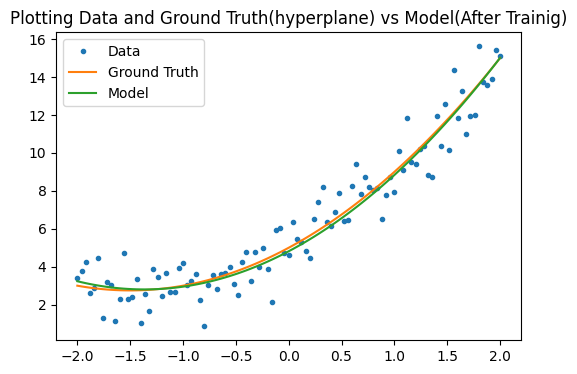

In [119]:
plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x.numpy(), f(x), label='Ground Truth')
plt.plot(x.numpy(), quad_model(x), label='Model')
plt.title("Plotting Data and Ground Truth(hyperplane) vs Model(After Trainig)")
plt.legend()
plt.show()